# The goal of this project is analyse how many points an EPL team needs to have to win the 2024-2025 Premier league

In [44]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
# load the data
data = pd.read_csv('eplchampions.csv')

In [118]:
data

,Season,Champion,Points,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,PtsDifferenceToRunnerUp
0,2023-24,ManchesterCity,91,28,7,3,96,34,62,2
1,2022-23,ManchesterCity,89,28,5,5,94,33,61,5
2,2021-22,ManchesterCity,93,29,6,3,99,26,73,1
3,2020-21,ManchesterCity,86,27,5,6,83,32,51,12
4,2019-20,Liverpool,99,32,3,3,85,33,52,18
5,2018-19,ManchesterCity,98,32,2,4,95,23,72,1
6,2017-18,ManchesterCity,100,32,4,2,106,27,79,19
7,2016-17,Chelsea,93,30,3,5,85,33,52,8
8,2015-16,LeicesterCity,81,23,12,3,68,36,32,10
9,2014-15,Chelsea,87,26,9,3,73,32,41,8


In [119]:
print(data.describe())

           Points       Wins      Draws     Losses  GoalsScored  \
count   14.000000  14.000000  14.000000  14.000000    14.000000   
mean    90.071429  28.071429   5.928571   4.000000    88.785714   
std      6.132690   2.894671   2.947340   1.240347    11.018715   
min     80.000000  23.000000   2.000000   2.000000    68.000000   
25%     86.250000  27.000000   4.250000   3.000000    83.500000   
50%     89.000000  28.000000   5.000000   4.000000    89.500000   
75%     93.000000  29.750000   6.750000   5.000000    95.750000   
max    100.000000  32.000000  12.000000   6.000000   106.000000   

       GoalsConceded  GoalDifference  PtsDifferenceToRunnerUp  
count      14.000000       14.000000                14.000000  
mean       32.500000       56.285714                 8.142857  
std         5.125352       13.952825                 5.749343  
min        23.000000       32.000000                 1.000000  
25%        29.750000       45.000000                 2.750000  
50%        3

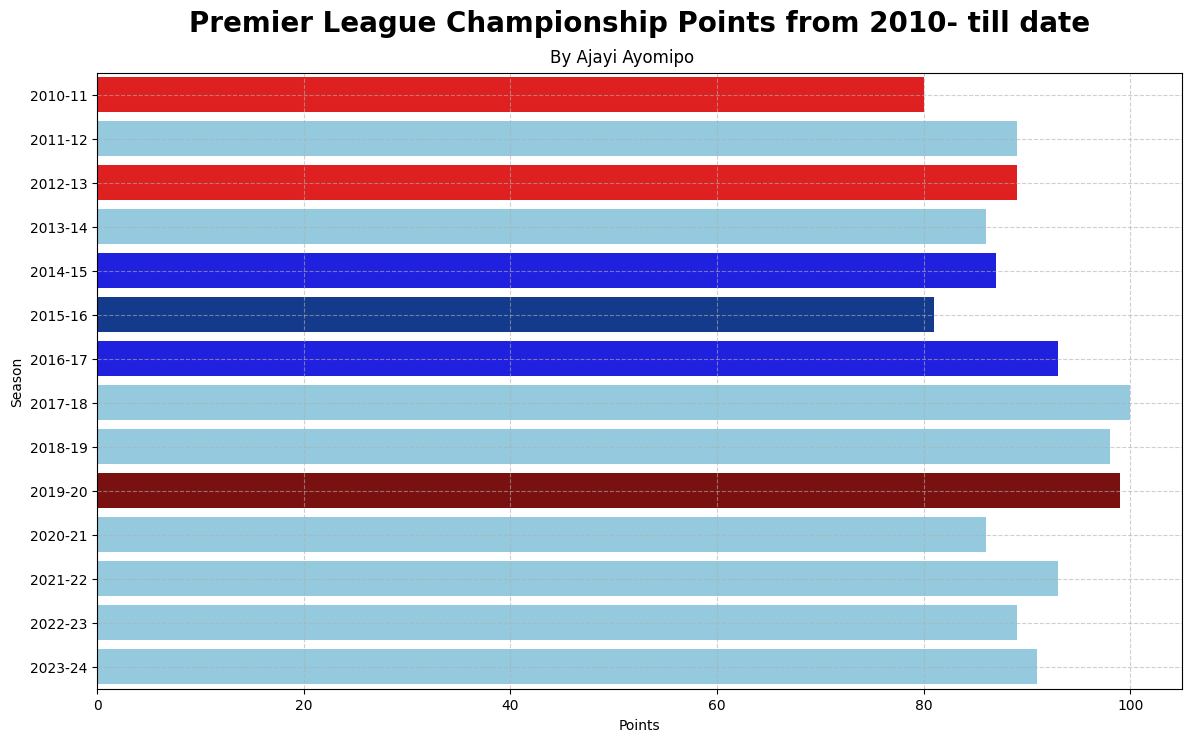

In [165]:
# Convert Season to a sortable format for proper visualization
data['Season'] = data['Season'].astype(str)  


# Sort data by Season for correct order in the bar chart
data = data.sort_values(by='Season')


club_colors = {
    'ManchesterCity': 'skyblue',
    'ManchesterUnited': 'red',
    'Liverpool': 'darkred',
    'Chelsea': 'blue',
    'LeicesterCity': '#0033A0'  
}

# Create a color column based on the club
data['Color'] = data['Champion'].map(club_colors)

# Plotting
plt.figure(figsize=(14, 8))

# Bar chart with specific colors
sns.barplot(x='Points', y='Season', data=data, palette=data['Color'], orient='h')

# Labels and title
plt.title('Premier League Championship Points from 2010- till date', fontsize=20, fontweight='bold', pad=30)
plt.xlabel('Points')
plt.ylabel('Season')
plt.grid(True, linestyle='--', alpha=0.6)

plt.text(x=0.5, y=0.90, s="By Ajayi Ayomipo", fontsize=12, ha='center', va='center',fontweight='light', transform=plt.gcf().transFigure,)

plt.savefig('premier_league_points.png', dpi=300, bbox_inches='tight')
plt.show()


From the viz above, we can observe that from the 2017-2018 season, the points expected to win the league has clearly increased compared to the previous seasons, so let's check the average points

In [121]:
data['Season'] = data['Season'].astype(str)

# Filter data for the first period: 2010-11 to 2016-17
season10to17 = data[(data['Season'] >= '2010-11') & (data['Season'] <= '2016-17')]

# Filter data for the second period: 2017-18 to 2023-24
season17to24 = data[(data['Season'] >= '2017-18') & (data['Season'] <= '2023-24')]

# Calculate average points for each period
# Calculate average points for each period
avg_points_period1 = round(season10to17['Points'].mean())
avg_points_period2 = round(season17to24['Points'].mean())

# Calculate the difference
diff_avg2and1 = round(avg_points_period2 - avg_points_period1)
print(f'Average points to win EPL from 2010-11 to 2016-17: {avg_points_period1}')
print(f'Average points to win EPL from 2017-18 to 2023-24: {avg_points_period2}')
print(f'Difference between winning the EPL from 2017-18 to 2023-24 and 2010-11 to 2016-17: {diff_avg2and1}')



Average points to win EPL from 2010-11 to 2016-17: 86
Average points to win EPL from 2017-18 to 2023-24: 94
Difference between winning the EPL from 2017-18 to 2023-24 and 2010-11 to 2016-17: 8


Over the past 7 seasons we will need an points of 94 to win the league compared to 2010-2016 season which is an average of 86 points. That difference is 8 points which means that a team will need to win 2 more matches which will give you 6 more points and turn 2losses to a draw which will give you 2 points

In [122]:
# Create another column for Runner up points
data['Runneruppts'] = data['Points'] - data['PtsDifferenceToRunnerUp']
data

,Season,Champion,Points,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,PtsDifferenceToRunnerUp,Color,Runneruppts
13,2010-11,ManchesterUnited,80,23,11,4,78,37,41,9,red,71
12,2011-12,ManchesterCity,89,28,6,4,93,29,64,8,skyblue,81
11,2012-13,ManchesterUnited,89,28,5,5,86,43,43,11,red,78
10,2013-14,ManchesterCity,86,27,5,6,102,37,65,2,skyblue,84
9,2014-15,Chelsea,87,26,9,3,73,32,41,8,blue,79
8,2015-16,LeicesterCity,81,23,12,3,68,36,32,10,#0033A0,71
7,2016-17,Chelsea,93,30,3,5,85,33,52,8,blue,85
6,2017-18,ManchesterCity,100,32,4,2,106,27,79,19,skyblue,81
5,2018-19,ManchesterCity,98,32,2,4,95,23,72,1,skyblue,97
4,2019-20,Liverpool,99,32,3,3,85,33,52,18,darkred,81


Looking at the datasets, we can observe that the championship points race has also been consistently tighter over the past 3 seasons, but it isn't so obvious so let's show some viz to clearly see it

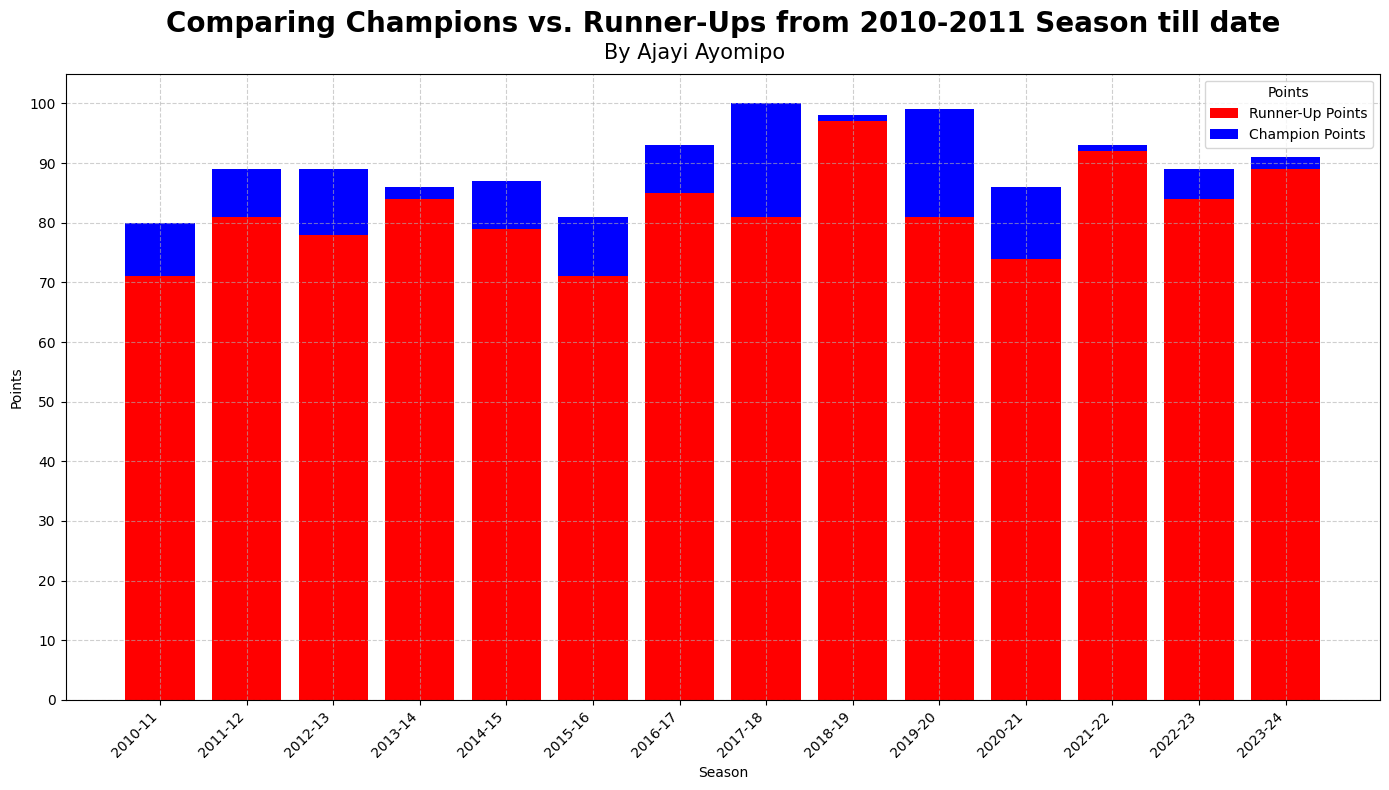

In [164]:

# Plotting
plt.figure(figsize=(14, 8))

# Plotting stacked bars
plt.bar(data['Season'], data['Runneruppts'], color='red', label='Runner-Up Points')
plt.bar(data['Season'], data['PtsDifferenceToRunnerUp'], bottom=data['Runneruppts'], color='blue', label='Champion Points')

# Customize the plot
plt.xlabel('Season')
plt.ylabel('Points')
plt.title('Comparing Champions vs. Runner-Ups from 2010-2011 Season till date', 
          fontsize=20, fontweight='bold', pad=30)  # Adjusted pad for space

# Set y-axis ticks to intervals of 10
max_points = data[['Points', 'Runneruppts']].max().max()
plt.yticks(range(0, int(max_points) + 10, 10))

# Set x-axis labels 
plt.xticks(data['Season'], rotation=45, ha='right')  

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(title='Points')

# I added my name
plt.text(x=0.5, y=0.927, s="By Ajayi Ayomipo", fontsize=15, ha='center', va='center',fontweight='light', transform=plt.gcf().transFigure,)

# Show plot
plt.tight_layout()

plt.savefig('premier_league_points_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

This also tells me that the Premier League is more competitive than before

It is very obvious that there is a perfect correlation between wins and points and there is positive correlation between goals scored and points. 

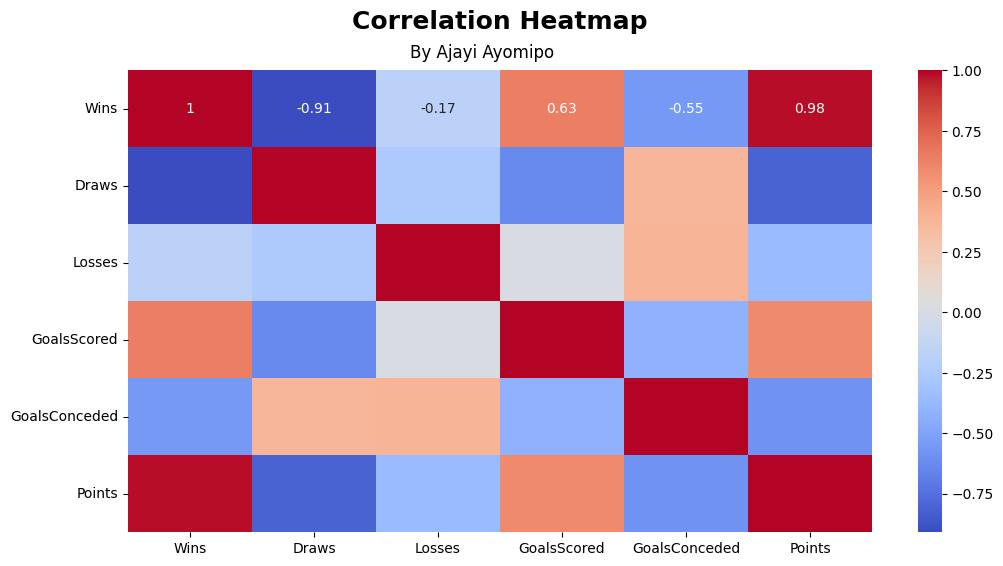

In [163]:
# Correlation Heatmap agaisnt Wins, Draws, Losses correlation with Points
plt.figure(figsize=(12, 6))
sns.heatmap(data[['Wins', 'Draws', 'Losses', 'GoalsScored', 'GoalsConceded', 'Points']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=30)
plt.text(x=0.42, y=0.91, s="By Ajayi Ayomipo", fontsize=12, ha='center', va='center',fontweight='light', transform=plt.gcf().transFigure,)

plt.savefig('Correlation_Heatmap_epl_pts.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Prepare features and target
X = data[['Wins', 'Draws', 'Losses', 'GoalsScored', 'GoalsConceded']]
y = data['Points']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
# Define XGBoost model using squarederror
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define parameter grid
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# Fit model with best parameters
best_xgb_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 20}
Best Score: -8.160563742610005


In [ ]:
# Predictions on test set
y_pred = best_xgb_model.predict(X_test_scaled)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

An MSE of approximately 6.4 indicates that the model’s predictions are, on average, about 6.4 points squared off from the actual points.  Since it’s squared, it magnifies larger errors.this actually mean that the RMSR is leading to approximately 2.53 points. 

Our XGBoost model is quite effective in predicting the points a team will achieve in the EPL. The RMSE of about 2.53 points means predictions are close to the actual points, though some variability is not captured. Also with an R² score of approximately 0.898 indicates that the model explains around 89.8% of the variance in the points achieved by EPL teams. This is actually a high score, suggesting the model does a good job of predicting points based on the input features (like goals scored, wins)

In [130]:
# This is a rough hypothetical values to predict 2024-25 season
data_for_prediction = pd.DataFrame({
    'Wins': [28],  # Example number of wins
    'Draws': [6],   # Example number of draws
    'Losses': [5],  # Example number of losses
    'GoalsScored': [97],  # Example number of goals scored
    'GoalsConceded': [30]  # Example number of goals conceded
})

# Standardize the new data
data_for_prediction_scaled = scaler.transform(data_for_prediction)

# Predict points for the new season season
predicted_points = best_xgb_model.predict(data_for_prediction_scaled)
print(f'Predicted Points Required to Win the Championship for 2024-25: {predicted_points[0]}')

Predicted Points Required to Win the Championship for 2024-25: 89.53874969482422
